In [6]:
%ls

Basics.ipynb          Week 10 Review.ipynb  hema_data.txt


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("hema_data.txt", sep='\t', header = 0, index_col = 0) 
df.head()

,CFU,poly,unk,int,mys,mid
gene,,,,,,
Mir682,13.657073,13.947856,0.137504,0.137504,0.137504,13.572700
Slc4a1,1.602704,9.729573,9.603170,4.856523,1.440708,0.534598
Tmem184a,0.881800,8.312915,8.838091,6.718636,1.058565,4.299882
Epb4.9,0.200265,8.066531,8.175530,6.895097,1.395968,4.562297
Mir3062,5.289897,0.137504,0.137504,6.542622,5.612211,0.137504


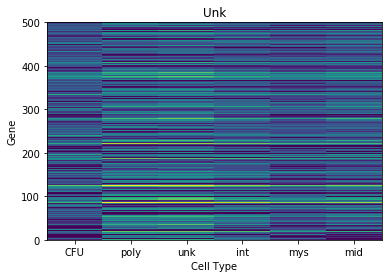

In [7]:
def plot_heatmap(df, title):
    plt.pcolor(df)
    plt.title(title)
    plt.xlabel("Cell Type")
    plt.ylabel("Gene")
    plt.xticks(np.arange(0.5, df.shape[1], 1), df.columns);

plot_heatmap(df, "Unk")    

In [22]:
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram

Z = linkage(df)
idx = leaves_list(Z)

df = df.iloc[idx]
#X = X[idx] for numpy arrays

df.head()

,CFU,poly,unk,int,mys,mid
gene,,,,,,
Mir682,13.657073,13.947856,0.137504,0.137504,0.137504,13.572700
Mir3062,5.289897,0.137504,0.137504,6.542622,5.612211,0.137504
Beta-s,10.222321,15.298995,14.789827,13.863287,12.553317,12.910033
Ftl1,11.462497,15.331512,14.800930,12.759093,11.578972,12.303324
Slc4a1,1.602704,9.729573,9.603170,4.856523,1.440708,0.534598


In [30]:
x = df["CFU"]
y = df["poly"]
ngenes = df.shape[0]


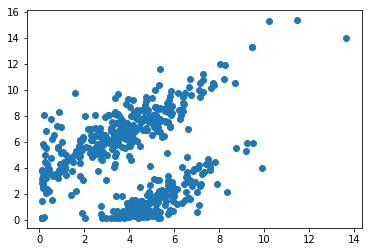

In [31]:
plt.scatter(x,y)

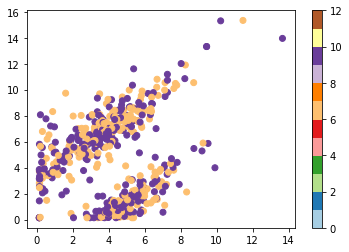

In [43]:
import random
#v = [i*3 for i in range(5)] #list comprehension
c = [random.choice([6,9]) for i in range(ngenes)]
plt.scatter(x, y, c=c, cmap = 'Paired', vmin = 0, vmax = 12)
plt.colorbar()

In [40]:
help (plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

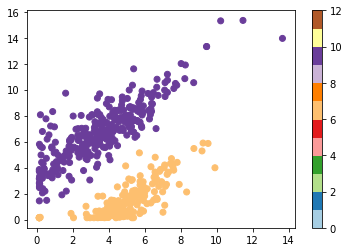

In [59]:
roi = y > x
c = np.zeros([ngenes]) + 6
c[roi] = 9
plt.scatter(x, y, c=c, cmap = 'Paired', vmin = 0, vmax = 12)
plt.colorbar()

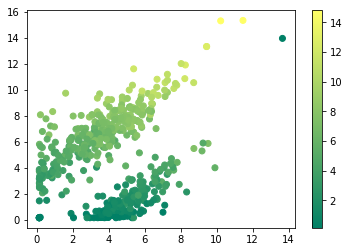

In [49]:
plt.scatter(x, y, c=df['unk'], cmap='summer');
plt.colorbar()

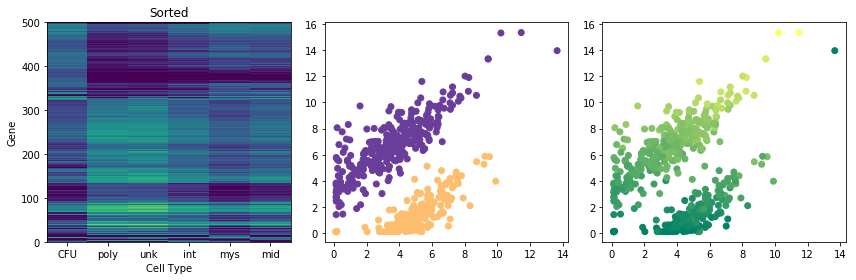

In [64]:
plt.figure(figsize=[12,4]) #Figsize: inches wide x inches tall
plt.subplot(1, 3, 1) #subplot: n plots tall, m plots wide, ith plot active, starts at 1, goes across
plot_heatmap(df, "Sorted")

plt.subplot(1, 3, 2)
roi = y > x
c = np.zeros([ngenes]) + 6
c[roi] = 9
plt.scatter(x, y, c=c, cmap = 'Paired', vmin = 0, vmax = 12)

plt.subplot(1, 3, 3)
plt.scatter(x, y, c=df['unk'], cmap='summer')
plt.tight_layout()
plt.savefig("summary_fig.pdf")

In [65]:
!open summary_fig.pdf


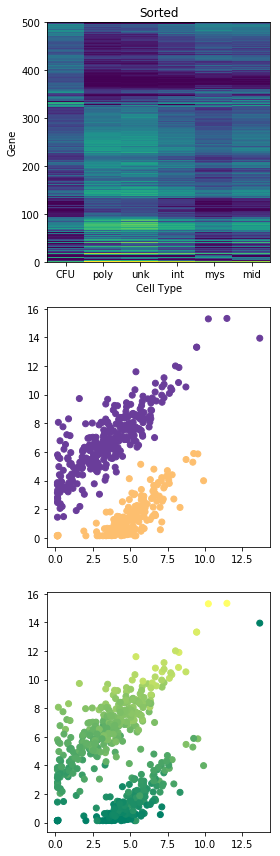

In [67]:
plt.figure(figsize=[4,12]) #Figsize: inches wide x inches tall
plt.subplot(3, 1, 1) #subplot: n plots tall, m plots wide, ith plot active, starts at 1, goes across
plot_heatmap(df, "Sorted")

plt.subplot(3, 1, 2)
roi = y > x
c = np.zeros([ngenes]) + 6
c[roi] = 9
plt.scatter(x, y, c=c, cmap = 'Paired', vmin = 0, vmax = 12)

plt.subplot(3, 1, 3)
plt.scatter(x, y, c=df['unk'], cmap='summer')
plt.tight_layout()